https://docs.google.com/presentation/d/1s77-3TWJfTUZXn1XGAFydcRGaVvstaOXj01UnN-l4D0/edit?slide=id.g24c5fdd6318_0_0#slide=id.g24c5fdd6318_0_0

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


#Read dataset

In [ ]:
# https://drive.google.com/file/d/1e2Yx2lBGdQqNWlRZidN4caULvGvS_NBS/view?usp=drive_link
url = f'https://drive.google.com/uc?id=1e2Yx2lBGdQqNWlRZidN4caULvGvS_NBS'
df = pd.read_csv(url)

**Following is the Data Dictionary for Credit Card dataset:**

CUST_ID : Identification of Credit Card holder (Categorical)

BALANCE : Balance amount left in their account to make purchases

BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

PURCHASES : Amount of purchases made from account

ONEOFF_PURCHASES : Maximum purchase amount done in one-go

INSTALLMENTS_PURCHASES : Amount of purchase done in installment

CASH_ADVANCE : Cash in advance given by the user

PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY : How frequently the cash in advance being paid

CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"

PURCHASES_TRX : Numbe of purchase transactions made

CREDIT_LIMIT : Limit of Credit Card for user

PAYMENTS : Amount of Payment done by user

MINIMUM_PAYMENTS : Minimum amount of payments made by user

PRCFULLPAYMENT : Percent of full payment paid by user

TENURE : Tenure of credit card service for user

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

#Preprocessing

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()/len(df)*100

CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

In [ ]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)
df.isnull().sum()/len(df)*100

<ipython-input-45-b2f10471caf0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
<ipython-input-45-b2f10471caf0>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0
ONEOFF_PURCHASES                    0.0
INSTALLMENTS_PURCHASES              0.0
CASH_ADVANCE                        0.0
PURCHASES_FREQUENCY                 0.0
ONEOFF_PURCHASES_FREQUENCY          0.0
PURCHASES_INSTALLMENTS_FREQUENCY    0.0
CASH_ADVANCE_FREQUENCY              0.0
CASH_ADVANCE_TRX                    0.0
PURCHASES_TRX                       0.0
CREDIT_LIMIT                        0.0
PAYMENTS                            0.0
MINIMUM_PAYMENTS                    0.0
PRC_FULL_PAYMENT                    0.0
TENURE                              0.0
dtype: float64

In [ ]:
#remove CUST_ID
df.drop('CUST_ID', axis=1, inplace=True)

#Scaling

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

#K-Means

##Choose the best K

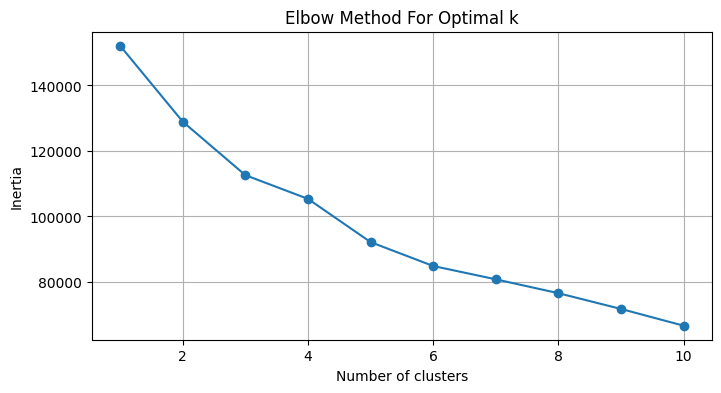

In [ ]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# V·∫Ω Elbow Chart
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

=> choose K = 4

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [ ]:
cluster_profile = df.groupby('Cluster').mean()
cluster_profile

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        5023.958508           0.967107   721.184928        453.485000   
1         109.464707           0.412883   351.589913        191.487250   
2        1253.422099           0.974766  2181.418772       1241.370362   
3        1500.348531           0.966640   282.216074        209.226223   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    267.804742   5075.737329             0.329511   
1                    160.571811    299.684391             0.320703   
2                    940.311888    234.489319             0.928436   
3                     73.305481    789.088912             0.206247   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                          0.161791                          0.220253   
1                          0.072810                          0.235009   
2                          0.390092                          0.748134   
3                          0.097865                          0.108084   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
Cluster                                                            
0                      0.510058         15.831959      10.420619   
1                      0.035164          0.732394       4.812877   
2                      0.041704          0.807310      32.718820   
3                      0.157946          3.000000       3.655490   

         CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
Cluster                                                                  
0         8215.313964  4176.805950       2227.858327          0.040022   
1         3628.936958  1036.107793        252.929103          0.253098   
2         5120.665715  2147.982881        784.272825          0.282880   
3         3226.815035   954.225631        816.131081          0.022924   

            TENURE  
Cluster             
0        11.414433  
1        11.216633  
2        11.727477  
3        11.485460

from matplotlib import pyplot as plt
cluster_profile['BALANCE'].plot(kind='hist', bins=20, title='BALANCE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile['BALANCE_FREQUENCY'].plot(kind='hist', bins=20, title='BALANCE_FREQUENCY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile['PURCHASES'].plot(kind='hist', bins=20, title='PURCHASES')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile['ONEOFF_PURCHASES'].plot(kind='hist', bins=20, title='ONEOFF_PURCHASES')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile.plot(kind='scatter', x='BALANCE', y='BALANCE_FREQUENCY', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile.plot(kind='scatter', x='BALANCE_FREQUENCY', y='PURCHASES', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile.plot(kind='scatter', x='PURCHASES', y='ONEOFF_PURCHASES', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile.plot(kind='scatter', x='ONEOFF_PURCHASES', y='INSTALLMENTS_PURCHASES', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile['BALANCE'].plot(kind='line', figsize=(8, 4), title='BALANCE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile['BALANCE_FREQUENCY'].plot(kind='line', figsize=(8, 4), title='BALANCE_FREQUENCY')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile['PURCHASES'].plot(kind='line', figsize=(8, 4), title='PURCHASES')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_profile['ONEOFF_PURCHASES'].plot(kind='line', figsize=(8, 4), title='ONEOFF_PURCHASES')
plt.gca().spines[['top', 'right']].set_visible(False)

**Cluster 0 ‚Äì Cash-Heavy Users**
BALANCE: cao (~5024)

CASH_ADVANCE: r·∫•t cao (~5076) ‚Üí s·ª≠ d·ª•ng r√∫t ti·ªÅn m·∫∑t nhi·ªÅu

PURCHASES: th·∫•p (~721)

CASH_ADVANCE_FREQUENCY: cao (~0.51)

PURCHASES_FREQUENCY: th·∫•p (~0.33)

PRC_FULL_PAYMENT: r·∫•t th·∫•p (~0.04) ‚Üí √≠t khi tr·∫£ h·∫øt n·ª£

=> ƒê√¢y l√† nh√≥m c√≥ xu h∆∞·ªõng r√∫t ti·ªÅn m·∫∑t nhi·ªÅu, chi ti√™u th·∫•p, v√† kh√¥ng tr·∫£ n·ª£ ƒë·∫ßy ƒë·ªß ‚Üí r·ªßi ro t√≠n d·ª•ng cao.

=> "Cash-Dependent Risk Users"


**Cluster 1 ‚Äì Inactive Low-Balance Users**
BALANCE: r·∫•t th·∫•p (~109)

PURCHASES v√† CASH_ADVANCE: th·∫•p

PURCHASES_TRX: th·∫•p (~4.8)

CASH_ADVANCE_TRX: g·∫ßn nh∆∞ kh√¥ng c√≥ (~0.7)

PRC_FULL_PAYMENT: kh√° cao (~0.25)

=> R·∫•t √≠t giao d·ªãch, s·ªë d∆∞ th·∫•p, √≠t r√∫t ti·ªÅn m·∫∑t, nh∆∞ng l·∫°i c√≥ t·ª∑ l·ªá thanh to√°n t·ªët ‚Üí ƒë√¢y l√† ng∆∞·ªùi d√πng th·ª• ƒë·ªông, r·ªßi ro th·∫•p.

=> "Dormant but Disciplined"

**Cluster 2 ‚Äì Heavy Spenders with High Activity**
PURCHASES: cao nh·∫•t (~2181)

PURCHASES_TRX: r·∫•t cao (~32.7)

PURCHASES_FREQUENCY: r·∫•t cao (~0.93)

CASH_ADVANCE: th·∫•p

PRC_FULL_PAYMENT: cao nh·∫•t (~0.28)

=> Ho·∫°t ƒë·ªông mua h√†ng m·∫°nh, th∆∞·ªùng xuy√™n, s·ª≠ d·ª•ng tr·∫£ g√≥p nhi·ªÅu, v√† thanh to√°n t·ªët ‚Üí nh√≥m kh√°ch h√†ng gi√° tr·ªã cao v√† trung th√†nh.

=> "Engaged High-Value Shoppers"

**Cluster 3 ‚Äì Low-Activity Moderate Users**
PURCHASES v√† CASH_ADVANCE: th·∫•p ƒë·∫øn trung b√¨nh

T·∫ßn su·∫•t mua s·∫Øm: th·∫•p (~0.2)

PRC_FULL_PAYMENT: r·∫•t th·∫•p (~0.02)

=> Nh√≥m n√†y c√≥ ho·∫°t ƒë·ªông y·∫øu, thanh to√°n kh√¥ng ƒë·∫ßy ƒë·ªß, c√≥ th·ªÉ l√† nh√≥m kh√°ch m·ªõi ho·∫∑c √≠t s·ª≠ d·ª•ng.

=> "Low Engagement, Low Payment"

#Hierarchical

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      201.802084        139.509787          0.000000      12        3  
1     4103.032597       1072.340217          0.222222      12        0  
2      622.066742        627.284787          0.000000      12        2  
3        0.000000        864.206542          0.000000      12        3  
4      678.334763        244.791237          0.000000      12        3  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        2  
89

In [ ]:
# 1. Ti·ªÅn x·ª≠ l√Ω d·ªØ li·ªáu (gi·∫£ ƒë·ªãnh ƒë√£ c√≥ df)
X = df.drop(columns=['Cluster'], errors='ignore')  # Lo·∫°i b·ªè nh√£n KMeans
X

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000        864.206542          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322        864.206542          0.000000       6  
8947    81

In [ ]:
# 2. Chu·∫©n h√≥a
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [ ]:
# 3. T√≠nh kho·∫£ng c√°ch & ph√¢n c·∫•p
linked = linkage(X_scaled, method='ward')
linked

array([[5.21900000e+03, 8.44200000e+03, 4.04454710e-03, 2.00000000e+00],
       [1.81000000e+02, 4.40100000e+03, 5.07945513e-03, 2.00000000e+00],
       [4.36200000e+03, 6.35900000e+03, 9.36040639e-03, 2.00000000e+00],
       ...,
       [1.78910000e+04, 1.78950000e+04, 1.51184679e+02, 3.41800000e+03],
       [1.78900000e+04, 1.78940000e+04, 1.59720612e+02, 5.53200000e+03],
       [1.78960000e+04, 1.78970000e+04, 2.04442635e+02, 8.95000000e+03]])

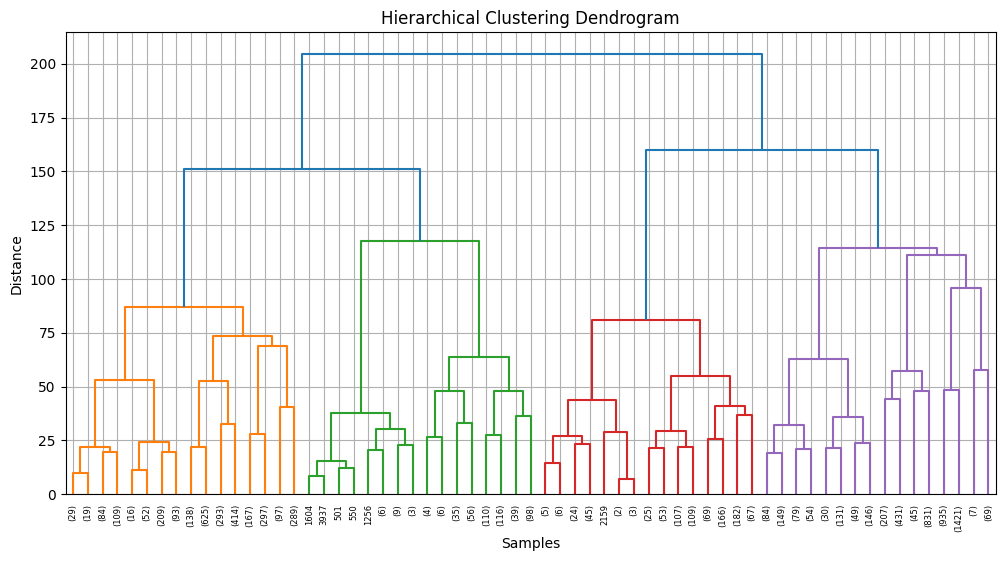

In [ ]:
# 4. V·∫Ω dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

=> 4 clusters

In [ ]:
# 5. √Åp d·ª•ng ph√¢n c·ª•m v·ªõi 4 c·ª•m
num_clusters = 4
df['HCluster'] = fcluster(linked, num_clusters, criterion='maxclust')
df

In [ ]:
# 6. Xem trung b√¨nh theo c·ª•m
cluster_profile = df.groupby('HCluster').mean()
cluster_profile

BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
HCluster                                                                  
1         1115.777861           0.975988  1329.751709        680.440699   
2         3261.592964           0.987867  6703.434969       4494.806448   
3         4733.393046           0.981978   389.403808        264.281863   
4         1082.617273           0.784368   317.087249        190.795311   

          INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
HCluster                                                              
1                     649.478386    422.112009             0.868399   
2                    2209.860554    428.807993             0.944802   
3                     125.239618   4742.439786             0.204784   
4                     126.612072    689.243507             0.258421   

          ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
HCluster                                                                 
1                           0.338744                          0.669564   
2                           0.751209                          0.766363   
3                           0.100882                          0.119632   
4                           0.078436                          0.176230   

          CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
HCluster                                                            
1                       0.077173          1.842033      23.312863   
2                       0.054552          1.156057      80.305955   
3                       0.495628         15.153935       4.723380   
4                       0.113230          2.146958       4.312982   

          CREDIT_LIMIT     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  \
HCluster                                                                  
1          4441.124655  1532.519529        632.798004          0.236684   
2          9125.770021  6224.082423       1486.107858          0.266065   
3          7716.724537  3674.262245       1658.389287          0.031881   
4          3448.347519  1031.305059        797.629549          0.112448   

             TENURE   Cluster  
HCluster                       
1         11.958376  2.046401  
2         11.948665  1.930185  
3         11.791667  0.716435  
4         11.144602  2.202656

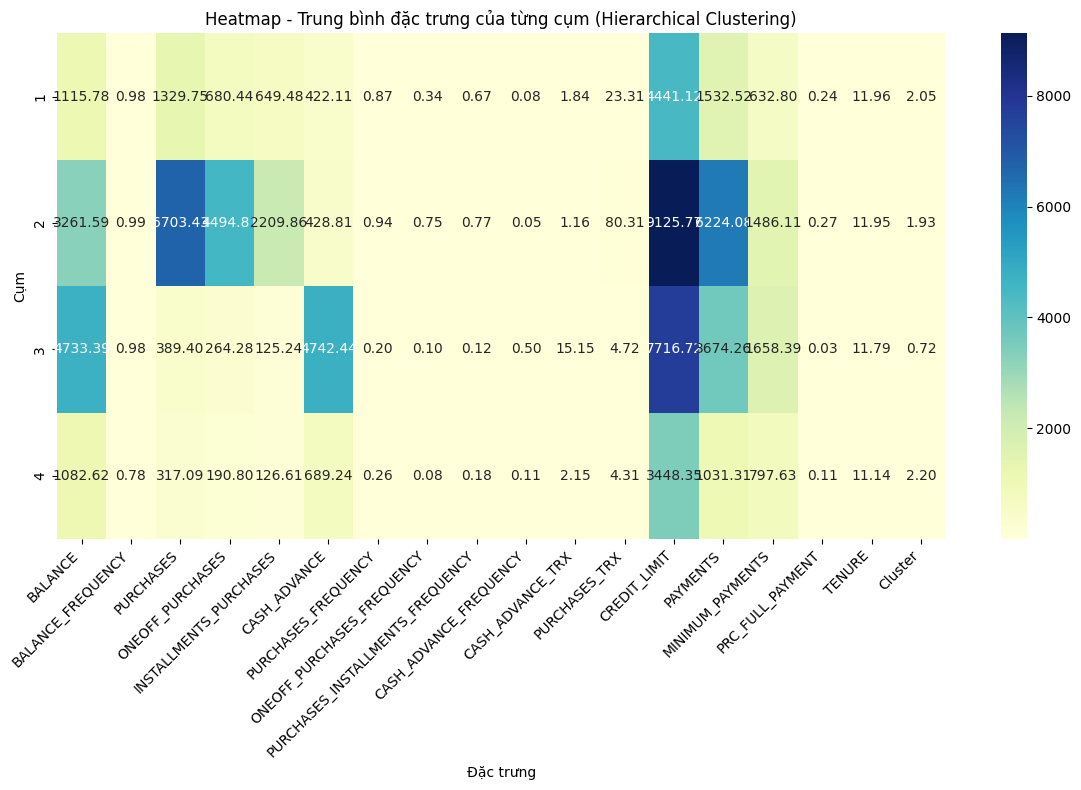

In [ ]:
# 7. V·∫Ω bi·ªÉu ƒë·ªì heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_profile, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Heatmap - Trung b√¨nh ƒë·∫∑c tr∆∞ng c·ªßa t·ª´ng c·ª•m (Hierarchical Clustering)')
plt.ylabel('C·ª•m')
plt.xlabel('ƒê·∫∑c tr∆∞ng')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

üîπ C·ª•m 1 (Cluster 1 ‚Äì nh√£n HCluster = 1)

Chi ti√™u trung b√¨nh: ~1,330

T·∫ßn su·∫•t giao d·ªãch: cao (0.87)

C√¢n b·∫±ng gi·ªØa one-off v√† installments

R√∫t ti·ªÅn m·∫∑t r·∫•t th·∫•p

Thanh to√°n t·ªët (PRC_FULL_PAYMENT = 0.24)

‚úÖ ƒê√¢y l√† nh√≥m kh√°ch h√†ng th∆∞·ªùng xuy√™n s·ª≠ d·ª•ng th·∫ª ƒë·ªÉ mua h√†ng, c√≥ h√†nh vi chi ti√™u ·ªïn ƒë·ªãnh v√† kh·∫£ nƒÉng thanh to√°n kh√°.
‚Üí Kh√°ch h√†ng trung th√†nh, n√™n duy tr√¨.

üîπ C·ª•m 2 (Cluster 2 ‚Äì HCluster = 2)

Chi ti√™u c·ª±c cao (6,700), ƒë·∫∑c bi·ªát l√† ONEOFF_PURCHASES (4,495)

T·∫ßn su·∫•t s·ª≠ d·ª•ng g·∫ßn nh∆∞ tuy·ªát ƒë·ªëi (0.94‚Äì0.77)

T·ª∑ l·ªá thanh to√°n ƒë·∫ßy ƒë·ªß cao nh·∫•t (0.27)

H·∫°n m·ª©c t√≠n d·ª•ng r·∫•t cao (~9,125)

‚úÖ Nh√≥m kh√°ch h√†ng VIP, chi ti√™u m·∫°nh, thanh to√°n t·ªët, d√πng th·∫ª cho c√°c giao d·ªãch l·ªõn.
‚Üí C·∫ßn ∆∞u ti√™n d·ªãch v·ª• cao c·∫•p, gi·ªØ ch√¢n l√¢u d√†i.

üîπ C·ª•m 3 (Cluster 3 ‚Äì HCluster = 3)

R√∫t ti·ªÅn m·∫∑t r·∫•t cao (~4,742)

Chi ti√™u mua s·∫Øm r·∫•t th·∫•p (~389)

T·∫ßn su·∫•t mua h√†ng th·∫•p (0.20)

T·ª∑ l·ªá tr·∫£ ƒë·ªß r·∫•t th·∫•p (0.03)

‚ö†Ô∏è ƒê√¢y l√† nh√≥m nguy c∆° t√≠n d·ª•ng cao, ch·ªß y·∫øu d√πng th·∫ª ƒë·ªÉ r√∫t ti·ªÅn m·∫∑t, kh√¥ng mua h√†ng nhi·ªÅu, tr·∫£ ch·∫≠m.
‚Üí N√™n ki·ªÉm so√°t t√≠n d·ª•ng, h·∫°n ch·∫ø n√¢ng h·∫°n m·ª©c.

üîπ C·ª•m 4 (Cluster 4 ‚Äì HCluster = 4)

T·∫•t c·∫£ ch·ªâ s·ªë ·ªü m·ª©c th·∫•p: chi ti√™u, t·∫ßn su·∫•t, h·∫°n m·ª©c, thanh to√°n

T·∫ßn su·∫•t c·∫≠p nh·∫≠t s·ªë d∆∞ th·∫•p nh·∫•t (0.78)

C√≥ d·∫•u hi·ªáu m·ªõi tham gia ho·∫∑c √≠t ho·∫°t ƒë·ªông

üìå Nh√≥m kh√°ch h√†ng th·ª• ƒë·ªông ho·∫∑c m·ªõi ‚Äì ch∆∞a khai th√°c ti·ªÅm nƒÉng.
‚Üí C·∫ßn chi·∫øn d·ªãch ti·∫øp c·∫≠n, khuy·∫øn kh√≠ch s·ª≠ d·ª•ng.



#PCA

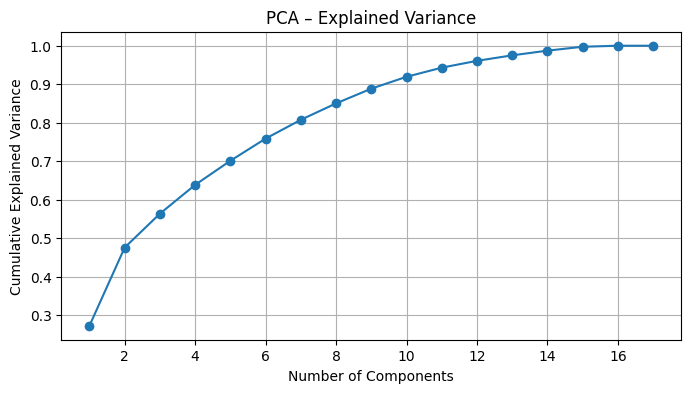

In [ ]:
# PCA kh√¥ng gi·∫£m ngay, ch·ªâ ƒë·ªÉ ph√¢n t√≠ch
pca = PCA()
pca.fit(scaled_data)

# T√≠nh t·ª∑ l·ªá ph∆∞∆°ng sai t√≠ch l≈©y
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA ‚Äì Explained Variance')
plt.grid(True)
plt.show()

##PCA 2D

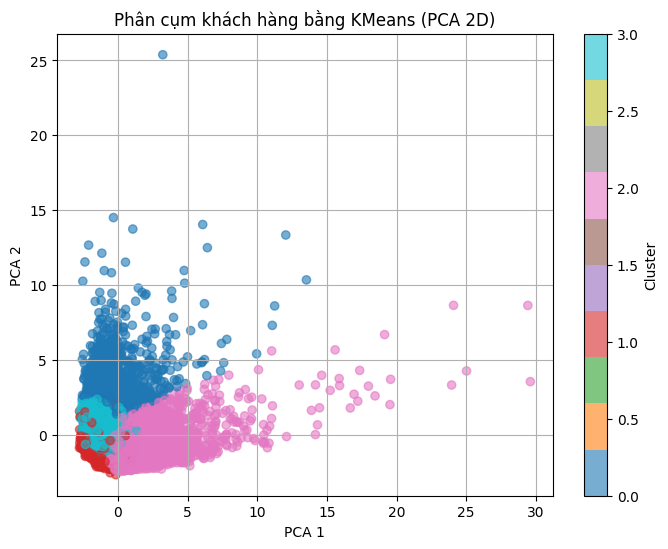

In [ ]:
# Gi·∫£m v·ªÅ 2 th√†nh ph·∫ßn ch√≠nh
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# V·∫Ω bi·ªÉu ƒë·ªì ph√¢n c·ª•m
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Cluster'], cmap='tab10', alpha=0.6)
plt.title('Ph√¢n c·ª•m kh√°ch h√†ng b·∫±ng KMeans (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
# PCA 2D
pca_2d = PCA(n_components=2)
pca_2d.fit(scaled_data)

# Ma tr·∫≠n c√°c th√†nh ph·∫ßn ch√≠nh (components)
pca_2d_components = pd.DataFrame(pca_2d.components_, columns=df.columns[:-1])  # Lo·∫°i b·ªè c·ªôt Cluster n·∫øu ƒë√£ th√™m
pca_2d_components.index = ['PCA1', 'PCA2']
print("PCA 2D Components:")
pca_2d_components

PCA 2D Components:


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
PCA1  0.101077           0.120043   0.411642          0.346407   
PCA2  0.403957           0.130537   0.041038          0.062872   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
PCA1                0.336814     -0.023343             0.321493   
PCA2               -0.018533      0.439242            -0.190780   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
PCA1                    0.294633                          0.274710   
PCA2                   -0.017924                         -0.178601   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
PCA1               -0.089139         -0.048654       0.390695      0.211663   
PCA2                0.434082          0.419734      -0.019394      0.238678   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
PCA1  0.266249          0.060351          0.132112  0.081021  
PCA2  0.257476          0.166970         -0.190026 -0.004326

üîπ PCA1 ‚Äì Li√™n quan ƒë·∫øn ho·∫°t ƒë·ªông mua s·∫Øm

C√°c ƒë·∫∑c tr∆∞ng c√≥ tr·ªçng s·ªë cao:

PURCHASES: 0.412

PURCHASES_TRX: 0.391

ONEOFF_PURCHASES: 0.346

INSTALLMENTS_PURCHASES: 0.337

PURCHASES_FREQUENCY: 0.321

‚úÖ Gi·∫£i th√≠ch: PCA1 c√≥ v·∫ª ƒë·∫°i di·ªán cho h√†nh vi ti√™u d√πng chung c·ªßa kh√°ch h√†ng ‚Äì ƒë·∫∑c bi·ªát l√† c√°c kho·∫£n mua s·∫Øm (one-off + installments) v√† t·∫ßn su·∫•t giao d·ªãch.

üîπ PCA2 ‚Äì Li√™n quan ƒë·∫øn vi·ªác r√∫t ti·ªÅn m·∫∑t

C√°c ƒë·∫∑c tr∆∞ng c√≥ tr·ªçng s·ªë cao:

CASH_ADVANCE: 0.439

CASH_ADVANCE_FREQUENCY: 0.434

CASH_ADVANCE_TRX: 0.420

BALANCE: 0.404

‚úÖ Gi·∫£i th√≠ch: PCA2 ph·∫£n √°nh h√†nh vi r√∫t ti·ªÅn m·∫∑t, bao g·ªìm s·ªë d∆∞ v√† t·∫ßn su·∫•t giao d·ªãch li√™n quan ƒë·∫øn cash advance.

üî∏ ƒê·∫∑c ƒëi·ªÉm n·ªïi b·∫≠t kh√°c:

CREDIT_LIMIT, PAYMENTS, v√† MINIMUM_PAYMENTS ƒë√≥ng g√≥p ·ªü c·∫£ PCA1 v√† PCA2, nh∆∞ng ·ªü m·ª©c trung b√¨nh ‚Üí c√≥ vai tr√≤ n·ªÅn.

PRC_FULL_PAYMENT c√≥ h·ªá s·ªë d∆∞∆°ng v·ªõi PCA1 nh∆∞ng √¢m v·ªõi PCA2 ‚Üí nh·ªØng ng∆∞·ªùi chi ti√™u cao (PCA1) th∆∞·ªùng c√≥ kh·∫£ nƒÉng thanh to√°n ƒë·∫ßy ƒë·ªß, trong khi ng∆∞·ªùi r√∫t ti·ªÅn m·∫∑t th∆∞·ªùng kh√¥ng thanh to√°n ƒë·∫ßy ƒë·ªß.

##PCA 3D

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

# PCA 3 th√†nh ph·∫ßn
pca = PCA(n_components=3)
pca_3d = pca.fit_transform(scaled_data)

# KMeans ph√¢n c·ª•m
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# T·∫°o DataFrame ƒë·ªÉ v·∫Ω
plot_df = pd.DataFrame(pca_3d, columns=['PCA1', 'PCA2', 'PCA3'])
plot_df['Cluster'] = clusters

# V·∫Ω bi·ªÉu ƒë·ªì 3D
fig = px.scatter_3d(plot_df, x='PCA1', y='PCA2', z='PCA3',
                    color=plot_df['Cluster'].astype(str),
                    title='Ph√¢n c·ª•m kh√°ch h√†ng (PCA 3D - KMeans)',
                    labels={'color': 'Cluster'},
                    opacity=0.7)
fig.show()

In [ ]:
# PCA 3D
pca_3d = PCA(n_components=3)
pca_3d.fit(scaled_data)

# Ma tr·∫≠n c√°c th√†nh ph·∫ßn ch√≠nh (components)
pca_3d_components = pd.DataFrame(pca_3d.components_, columns=df.columns[:-1])  # Lo·∫°i b·ªè c·ªôt Cluster n·∫øu ƒë√£ th√™m
pca_3d_components.index = ['PCA1', 'PCA2', 'PCA3']
print("PCA 3D Components:")
pca_3d_components

PCA 3D Components:


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
PCA1  0.101077           0.120043   0.411642          0.346407   
PCA2  0.403957           0.130537   0.041038          0.062872   
PCA3  0.160075           0.420630  -0.257903         -0.392115   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
PCA1                0.336814     -0.023343             0.321493   
PCA2               -0.018533      0.439242            -0.190780   
PCA3                0.110488      0.027345             0.374691   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
PCA1                    0.294633                          0.274710   
PCA2                   -0.017924                         -0.178601   
PCA3                   -0.115131                          0.473409   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
PCA1               -0.089139         -0.048654       0.390695      0.211663   
PCA2                0.434082          0.419734      -0.019394      0.238678   
PCA3                0.109072          0.115541       0.077331     -0.100483   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
PCA1  0.266249          0.060351          0.132112  0.081021  
PCA2  0.257476          0.166970         -0.190026 -0.004326  
PCA3 -0.276237          0.221635         -0.124774  0.064326

üîπ PCA1 ‚Äì H√†nh vi mua s·∫Øm

C√°c ƒë·∫∑c tr∆∞ng n·ªïi b·∫≠t (h·ªá s·ªë l·ªõn nh·∫•t):

PURCHASES: 0.4116

PURCHASES_TRX: 0.3907

ONEOFF_PURCHASES: 0.3464

INSTALLMENTS_PURCHASES: 0.3368

PURCHASES_FREQUENCY: 0.3215

üìå √ù nghƒ©a: PCA1 ƒë·∫°i di·ªán cho ho·∫°t ƒë·ªông mua s·∫Øm ‚Äì c·∫£ v·ªÅ t·ªïng gi√° tr·ªã v√† t·∫ßn su·∫•t. Kh√°ch h√†ng c√≥ ƒëi·ªÉm cao theo PCA1 l√† ng∆∞·ªùi th∆∞·ªùng xuy√™n chi ti√™u b·∫±ng th·∫ª t√≠n d·ª•ng.

üîπ PCA2 ‚Äì R√∫t ti·ªÅn m·∫∑t v√† n·ª£

C√°c ƒë·∫∑c tr∆∞ng n·ªïi b·∫≠t:

CASH_ADVANCE: 0.4392

CASH_ADVANCE_FREQUENCY: 0.4341

CASH_ADVANCE_TRX: 0.4197

BALANCE: 0.4040

CREDIT_LIMIT: 0.2387

üìå √ù nghƒ©a: PCA2 ph·∫£n √°nh th√≥i quen r√∫t ti·ªÅn m·∫∑t v√† m·ª©c n·ª£ t·ªìn ƒë·ªçng. Nh·ªØng ng∆∞·ªùi c√≥ ƒëi·ªÉm PCA2 cao c√≥ xu h∆∞·ªõng r√∫t ti·ªÅn t·ª´ th·∫ª t√≠n d·ª•ng thay v√¨ ch·ªâ d√πng ƒë·ªÉ mua h√†ng.

üîπ PCA3 ‚Äì M·ª©c ƒë·ªô thanh to√°n ƒë·ªÅu ƒë·∫∑n & chi ti·∫øt h√†nh vi

C√°c ƒë·∫∑c tr∆∞ng n·ªïi b·∫≠t:

PURCHASES_INSTALLMENTS_FREQUENCY: 0.4734

BALANCE_FREQUENCY: 0.4206

PURCHASES_FREQUENCY: 0.3747

MINIMUM_PAYMENTS: 0.2216

INSTALLMENTS_PURCHASES: 0.1105

ƒê·∫∑c tr∆∞ng ti√™u c·ª±c:

ONEOFF_PURCHASES: -0.3921

PAYMENTS: -0.2762

üìå √ù nghƒ©a: PCA3 d∆∞·ªùng nh∆∞ ph·∫£n √°nh m·ª©c ƒë·ªô ƒë·ªÅu ƒë·∫∑n v√† h√¨nh th·ª©c thanh to√°n:

Ng∆∞·ªùi c√≥ ƒëi·ªÉm cao ·ªü PCA3 th∆∞·ªùng tr·∫£ ti·ªÅn theo k·ª≥ h·∫°n (installments), thanh to√°n t·ªëi thi·ªÉu, v√† mua h√†ng theo chu k·ª≥.

Ng∆∞·ªùi c√≥ ƒëi·ªÉm th·∫•p c√≥ xu h∆∞·ªõng mua m·ªôt l·∫ßn nhi·ªÅu v√† thanh to√°n to√†n b·ªô.

#Comparision

In [ ]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster

In [ ]:
# D·ªØ li·ªáu ƒë√£ chu·∫©n h√≥a: X_scaled

### 1. KMeans clustering
kmeans_labels = kmeans.fit_predict(X_scaled)

kmeans_score = silhouette_score(X_scaled, kmeans_labels)
print(f"Silhouette Score - KMeans: {kmeans_score:.4f}")

### 2. Hierarchical clustering (Ward method)
linked = linkage(X_scaled, method='ward')
hclust_labels = fcluster(linked, 4, criterion='maxclust')

hclust_score = silhouette_score(X_scaled, hclust_labels)
print(f"Silhouette Score - Hierarchical: {hclust_score:.4f}")

Silhouette Score - KMeans: 0.1664
Silhouette Score - Hierarchical: 0.1547
